In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
combined = pd.read_csv("combined.csv")

In [12]:
correlations = combined.corr()
correlations["sat_score"].head(10)

Unnamed: 0                              0.013273
SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Cohort                                  0.021102
Total Cohort                            0.325144
Name: sat_score, dtype: float64

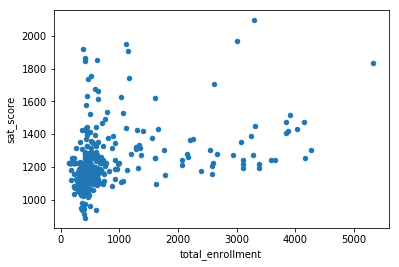

In [13]:
combined.plot.scatter("total_enrollment", "sat_score")

Judging from above shape of the plot, there is no strong correlation between enrollment and sat_score - there is one huge cluster and then some schools veer-off into different directions. A clear line will have been seen if there is a strong correlation. 

The cluster seen when sat_score is low and enrollment is low, is however interesting, and we should examine this schools.

In [15]:
low_enrollment = combined[(combined["total_enrollment"] < 1000) & (combined["sat_score"] < 1000)]
low_enrollment["School Name"]

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

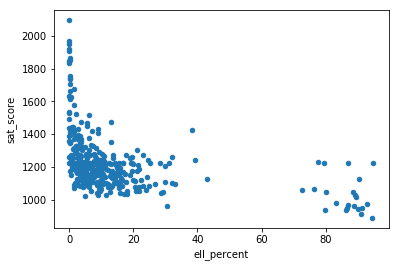

In [16]:
combined.plot.scatter("ell_percent", "sat_score")

In [17]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()

m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)


plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

The above map shows the density of English language learner schools which is highest in Manhattan

In [18]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()

m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined["ell_percent"], cmap="summer")


plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

Unfortunately, due to the number of schools, it's hard to interpret the map we made on the last screen. It looks like uptown Manhattan and parts of Queens have a higher ell_percent, but we can't be sure. One way to make very granular statistics easier to read is to aggregate them. In this case, we can aggregate by district, which will enable us to plot ell_percent district-by-district instead of school-by-school.

In [19]:
districts = combined.groupby("school_dist").agg(np.mean)
districts.reset_index(inplace=True)
districts.head()

,school_dist,Unnamed: 0,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Cohort,...,total_students,number_programs,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL
0,1,2.5,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,2006.000000,...,659.500000,1.333333,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09
1,2,29.5,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,1713.458333,...,621.395833,1.416667,0.0,0.0,0.0,4.204005,2.963296,1132.479744,1.103862e+06,1.070438e+09
2,3,59.5,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,1504.500000,...,717.916667,2.000000,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09
3,4,69.0,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,2006.000000,...,580.857143,1.142857,0.0,0.0,0.0,11.000000,8.000000,2637.000000,1.055874e+06,1.016681e+09
4,5,76.0,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,1432.857143,...,609.857143,1.142857,0.0,0.0,0.0,9.428571,8.142857,9372.571429,1.063080e+06,1.019721e+09


In [ ]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()

m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], cmap="summer")


plt.show()